In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
palette=sns.color_palette('Set2')

In [8]:
data = pd.read_csv("MushroomDataset/secondary_data.csv")

In [14]:
data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


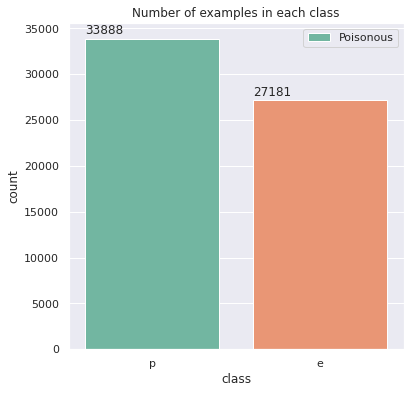

In [113]:
plt.figure(figsize=(6,6))
plt.title('Number of examples in each class')
g = sns.countplot(x='class', data=data)
    
plt.legend(labels=["Poisonous","Edible"])
    #_ = plt.setp(g.get_xticklabels(), rotation=90)  # Rotate labels


for p in g.patches:
         txt = str(p.get_height().round(1)) 
         txt_x = p.get_x() 
         txt_y = p.get_height()+ 500
         g.text(txt_x,txt_y,txt)

In [139]:

def plot_nested_countplot(data, label, feature, fsize=(6,6), title_ ="", labels_ = None): 
    plt.figure(figsize=fsize)
    temp = (data.groupby(label)[feature]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     )
    g = sns.barplot(x=feature, y="percentage", hue=label, data=temp)
    
    if(labels_ == None):
        plt.legend(labels=data[label].unique())
    else:
        plt.legend(labels=labels_)
    #_ = plt.setp(g.get_xticklabels(), rotation=90)  # Rotate labels
    plt.title(title_)

    for p in g.patches:
         txt = str(p.get_height().round(1)) + '%'
         txt_x = p.get_x() 
         txt_y = p.get_height()+1
         g.text(txt_x,txt_y,txt)
        


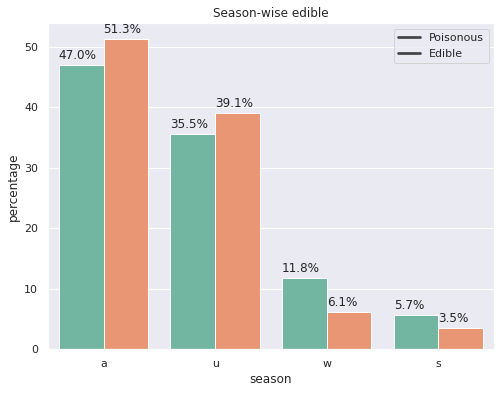

In [150]:
plot_nested_countplot(data=data, label='class', feature='season', 
                      fsize = (8,6),
                      title_='Season-wise edible', 
                      labels_=['Poisonous', 'Edible'])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


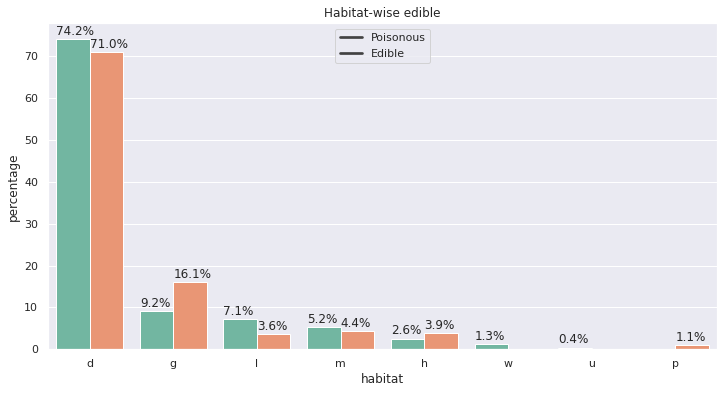

In [143]:
plot_nested_countplot(data=data, label='class', feature='habitat', 
                      fsize = (12,6),
                      title_='Habitat-wise edible', 
                      labels_=['Poisonous', 'Edible'])


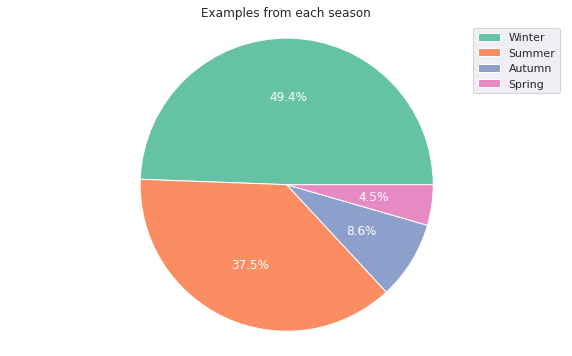

In [125]:
#Pie Chart for the Sentiments Percentage 
plt.figure(figsize=(10,6))
plt.pie(data['season'].value_counts(), labels=['Winter', 'Summer', 'Autumn', 'Spring'], autopct='%.1f%%', textprops={'color':"w"})
plt.legend(loc='upper right')
plt.axis('equal')
plt.title('Examples from each season')
plt.show()

In [10]:
def categorical_data_labeling_with_missing_value(df, not_categorical_col):

  labels = {}
  df = df.fillna(0)
  for col in df.columns:
    if col not in not_categorical_col:
      dic_col = {} 
      unq = df[col].unique()
      if 0 in unq:
        dic_col['NaN'] = 0
        unq = np.delete(unq, np.where(unq==0))
      #print(unq)
      for i in range(len(unq)):
        df[col] = df[col].replace(unq[i], i+1)
        dic_col[unq[i]] = i+1;
      labels[col] = dic_col;
  return df, labels


In [11]:
not_categorical_col = ['cap-diameter', 'stem-height', 'stem-width' ]
df, category_labels = categorical_data_labeling_with_missing_value(data, not_categorical_col)

In [12]:
print(category_labels)

{'class': {'p': 1, 'e': 2}, 'cap-shape': {'x': 1, 'f': 2, 'p': 3, 'b': 4, 'c': 5, 's': 6, 'o': 7}, 'cap-surface': {'NaN': 0, 'g': 1, 'h': 2, 't': 3, 'y': 4, 'e': 5, 's': 6, 'l': 7, 'd': 8, 'w': 9, 'i': 10, 'k': 11}, 'cap-color': {'o': 1, 'e': 2, 'n': 3, 'g': 4, 'r': 5, 'w': 6, 'y': 7, 'p': 8, 'u': 9, 'b': 10, 'l': 11, 'k': 12}, 'does-bruise-or-bleed': {'f': 1, 't': 2}, 'gill-attachment': {'NaN': 0, 'e': 1, 'a': 2, 'd': 3, 's': 4, 'x': 5, 'p': 6, 'f': 7}, 'gill-spacing': {'NaN': 0, 'c': 1, 'd': 2, 'f': 3}, 'gill-color': {'w': 1, 'n': 2, 'p': 3, 'u': 4, 'b': 5, 'g': 6, 'y': 7, 'r': 8, 'e': 9, 'o': 10, 'k': 11, 'f': 12}, 'stem-root': {'NaN': 0, 's': 1, 'b': 2, 'r': 3, 'c': 4, 'f': 5}, 'stem-surface': {'NaN': 0, 'y': 1, 's': 2, 'k': 3, 'i': 4, 'h': 5, 't': 6, 'g': 7, 'f': 8}, 'stem-color': {'w': 1, 'y': 2, 'n': 3, 'u': 4, 'b': 5, 'l': 6, 'r': 7, 'p': 8, 'e': 9, 'k': 10, 'g': 11, 'o': 12, 'f': 13}, 'veil-type': {'NaN': 0, 'u': 1}, 'veil-color': {'NaN': 0, 'w': 1, 'y': 2, 'n': 3, 'e': 4, 'u'

In [13]:
df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,1,15.26,1,1,1,1,1,0,1,16.95,...,1,1,1,1,1,1,1,0,1,1
1,1,16.60,1,1,1,1,1,0,1,17.99,...,1,1,1,1,1,1,1,0,1,2
2,1,14.07,1,1,1,1,1,0,1,17.80,...,1,1,1,1,1,1,1,0,1,1
3,1,14.17,2,2,2,1,1,0,1,15.77,...,1,1,1,1,1,1,2,0,1,1
4,1,14.64,1,2,1,1,1,0,1,16.53,...,1,1,1,1,1,1,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1,1.18,6,6,7,1,7,3,12,3.93,...,0,0,2,0,0,2,5,0,1,3
61065,1,1.27,2,6,7,1,7,3,12,3.18,...,0,0,2,0,0,2,5,0,1,3
61066,1,1.27,6,6,7,1,7,3,12,3.86,...,0,0,2,0,0,2,5,0,1,2
61067,1,1.24,2,6,7,1,7,3,12,3.56,...,0,0,2,0,0,2,5,0,1,2


In [154]:
df['class'].value_counts()

1    33888
2    27181
Name: class, dtype: int64

In [155]:
X = df.drop(columns=['class'])
X.shape

(61069, 20)

In [156]:
y = df['class']
y.shape

(61069,)

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 2)


In [158]:
print("Train Set: \n", y_train.value_counts())
print("Test Set: \n", y_test.value_counts())

Train Set: 
 1    25444
2    20357
Name: class, dtype: int64
Test Set: 
 1    8444
2    6824
Name: class, dtype: int64


In [16]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X, y)
clf.score(X, y)

0.6703728569323224

In [28]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]


# iterate over classifiers
for name, clf in zip(names, classifiers):
#     ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(name, score)


Nearest Neighbors 0.9996725176840451
Linear SVM 0.6789363374377784
RBF SVM 0.9474063400576369
Decision Tree 0.7475111343987425
Random Forest 0.840319622740372
Neural Net 0.9619465548860362
AdaBoost 0.8156274561173696
Naive Bayes 0.6125884202253078
QDA 0.7458082263557768


In [159]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report
target_names = ['Poisonous', 'Edible']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   Poisonous       1.00      1.00      1.00      8444
      Edible       1.00      1.00      1.00      6824

    accuracy                           1.00     15268
   macro avg       1.00      1.00      1.00     15268
weighted avg       1.00      1.00      1.00     15268



In [161]:
import pickle
# save the model to disk
filename = 'best_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [163]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9996725176840451
